# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

### IMPORTS


In [473]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [474]:
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00%,6.00%,5200.00%,10.00%,Time,NaN,NaN,NaN,...,NaN,NaN,866.67%,0.41%,NaN,27.29%,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00%,4.91%,300.00%,28.00%,Volume,310.00%,0.80%,5.00%,...,2891.67%,NaN,40.74%,23.00%,30.56%,2.58%,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00%,15.34%,3800.00%,83.30%,Volume,190.00%,2.00%,35.00%,...,759.00%,1.49%,249.22%,2.19%,32.79%,21.83%,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.00%,1200.00%,26.00%,Volume,NaN,NaN,NaN,...,NaN,NaN,75.00%,2.17%,NaN,12.55%,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.49%,250.00%,4.50%,Volume,NaN,1.60%,32.00%,...,NaN,NaN,167.22%,1.82%,NaN,52.22%,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00%,47.94%,NaN,110.00%,Mix,142.00%,0.80%,150.00%,...,90.81%,NaN,NaN,0.18%,NaN,9.18%,39.68%,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29%,10.18%,4500.00%,57.00%,Volume,190.00%,0.80%,8.00%,...,1708.10%,1.62%,442.10%,1.24%,51.09%,6.04%,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00%,14.75%,2331.50%,51.57%,Time,170.00%,1.40%,4.00%,...,842.86%,1.85%,158.04%,4.45%,30.37%,22.37%,45.83%,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.44%,4400.00%,134.00%,Volume,NaN,NaN,NaN,...,NaN,NaN,93.49%,35.39%,32.05%,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

### Data Imputation

We choose to pretend that we are going to be building a regression model where our y-hat is going to be the [AverageBackwashVolume]. After brief analysis and discussion we have decided that this feature is good candidate for a model to predict how much water is required to wash the filter based on certain features.


In [475]:
# Start by removing the irrelevant columns, i.e. the columns that are not needed for the analysis. [WaterWorksName]
df.drop(['WaterworksName'], axis=1, inplace=True)


In [476]:
# Print the percentage of missing values in each column
print("Percentage of Missing Values")
pd.options.display.float_format = '{:.2f}%'.format
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage.sort_values(inplace=True)
display(missing_percentage)

# We have several columns with missing values. 
# We decided to drop the columns with more than 40% missing values, because these columns will introduce too much uncertinty when imputed.

# Dropping columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index
df.drop(columns=columns_to_drop, inplace=True)

# Since AverageBackWashVolume is our y-hat we are dropping all missing values. To keep the data as clean as possible.
df.dropna(subset=['AverageBackwashVolume'], inplace=True)

# Verify the removal of columns by printing the table with the percentages again
print("Percentage of Missing Values After Dropping Rows")
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage.sort_values(inplace=True)
display(missing_percentage)



Percentage of Missing Values


TotalFilters                 0.00%
PrimaryTrigger               0.00%
OxygenFactor                 0.00%
AerationType                 0.00%
Stages                       0.00%
AbstractedVolume             0.00%
GravityPressureMixed         0.00%
AverageTypicalRunVolume      2.53%
TankCapacity                 5.06%
Footprint                    5.06%
AverageFilterArea            5.06%
UFRV                         8.86%
AverageBackwashVolume       12.66%
BW%                         16.46%
MaxTypicalFlow              20.25%
FilterExploitation          20.25%
Stage1HLR                   26.58%
HLR_BW                      34.18%
TankExploitation            37.97%
AverageTotalFilterDepth     41.77%
AverageFilterBedVolume      43.04%
OverallFilterGrainSizeMax   43.04%
OverallFilterGrainSizeMin   43.04%
TotalEBCT                   49.37%
SumOfld_layer               49.37%
UniformityCoefficient       64.56%
dtype: float64

Percentage of Missing Values After Dropping Rows


TotalFilters               0.00%
AerationType               0.00%
PrimaryTrigger             0.00%
AverageBackwashVolume      0.00%
OxygenFactor               0.00%
AbstractedVolume           0.00%
Stages                     0.00%
GravityPressureMixed       0.00%
AverageTypicalRunVolume    2.90%
TankCapacity               4.35%
Footprint                  4.35%
AverageFilterArea          4.35%
BW%                        4.35%
UFRV                       8.70%
FilterExploitation        17.39%
MaxTypicalFlow            17.39%
Stage1HLR                 23.19%
HLR_BW                    28.99%
TankExploitation          34.78%
dtype: float64

We wanted to remove outlies, however we could not find a proper criteria to do so. When using the IQR method over 50% of the data was removed, resulting in a very small dataset which could lead to overfitting. We couldn't find a proper criteria for the IQR method, so we decided to keep the outliers in the dataset.

In [477]:
# Removing outliers using the IQR method for each column
# We will apply this only to numerical columns
# numerical_columns = df.select_dtypes(include=["float", "int"]).columns

# for column in numerical_columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 3.5 * IQR
#     upper_bound = Q3 + 3.5 * IQR
    
#     # Remove rows where the column value is outside these bounds
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Create a boxplot for each feature to visualize remaining data after outlier removal
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df, orient="h", palette="Set2")
# plt.title('Boxplot of Features After Outlier Removal')
# plt.show()

In [478]:
# These are not ordinal values, so we choose to one-hot encode them.
df = pd.get_dummies(df, columns=['AerationType', 'PrimaryTrigger', 'GravityPressureMixed'])

# Since the data in the 'Stages' column is ordinal, we choose to replace the values with integers instead of one-hot encoding
df['Stages'] = df['Stages'].replace({'Mixed': 0, 'Single': 1, 'Double': 2, "Triple": 3})

/tmp/ipykernel_8925/3790904296.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stages'] = df['Stages'].replace({'Mixed': 0, 'Single': 1, 'Double': 2, "Triple": 3})


We decided to use linear regression for imputation so, we create a correlation matrix, to find if the features to be imputed had any correlating features. Otherwise, we are just going to use mean imputation.


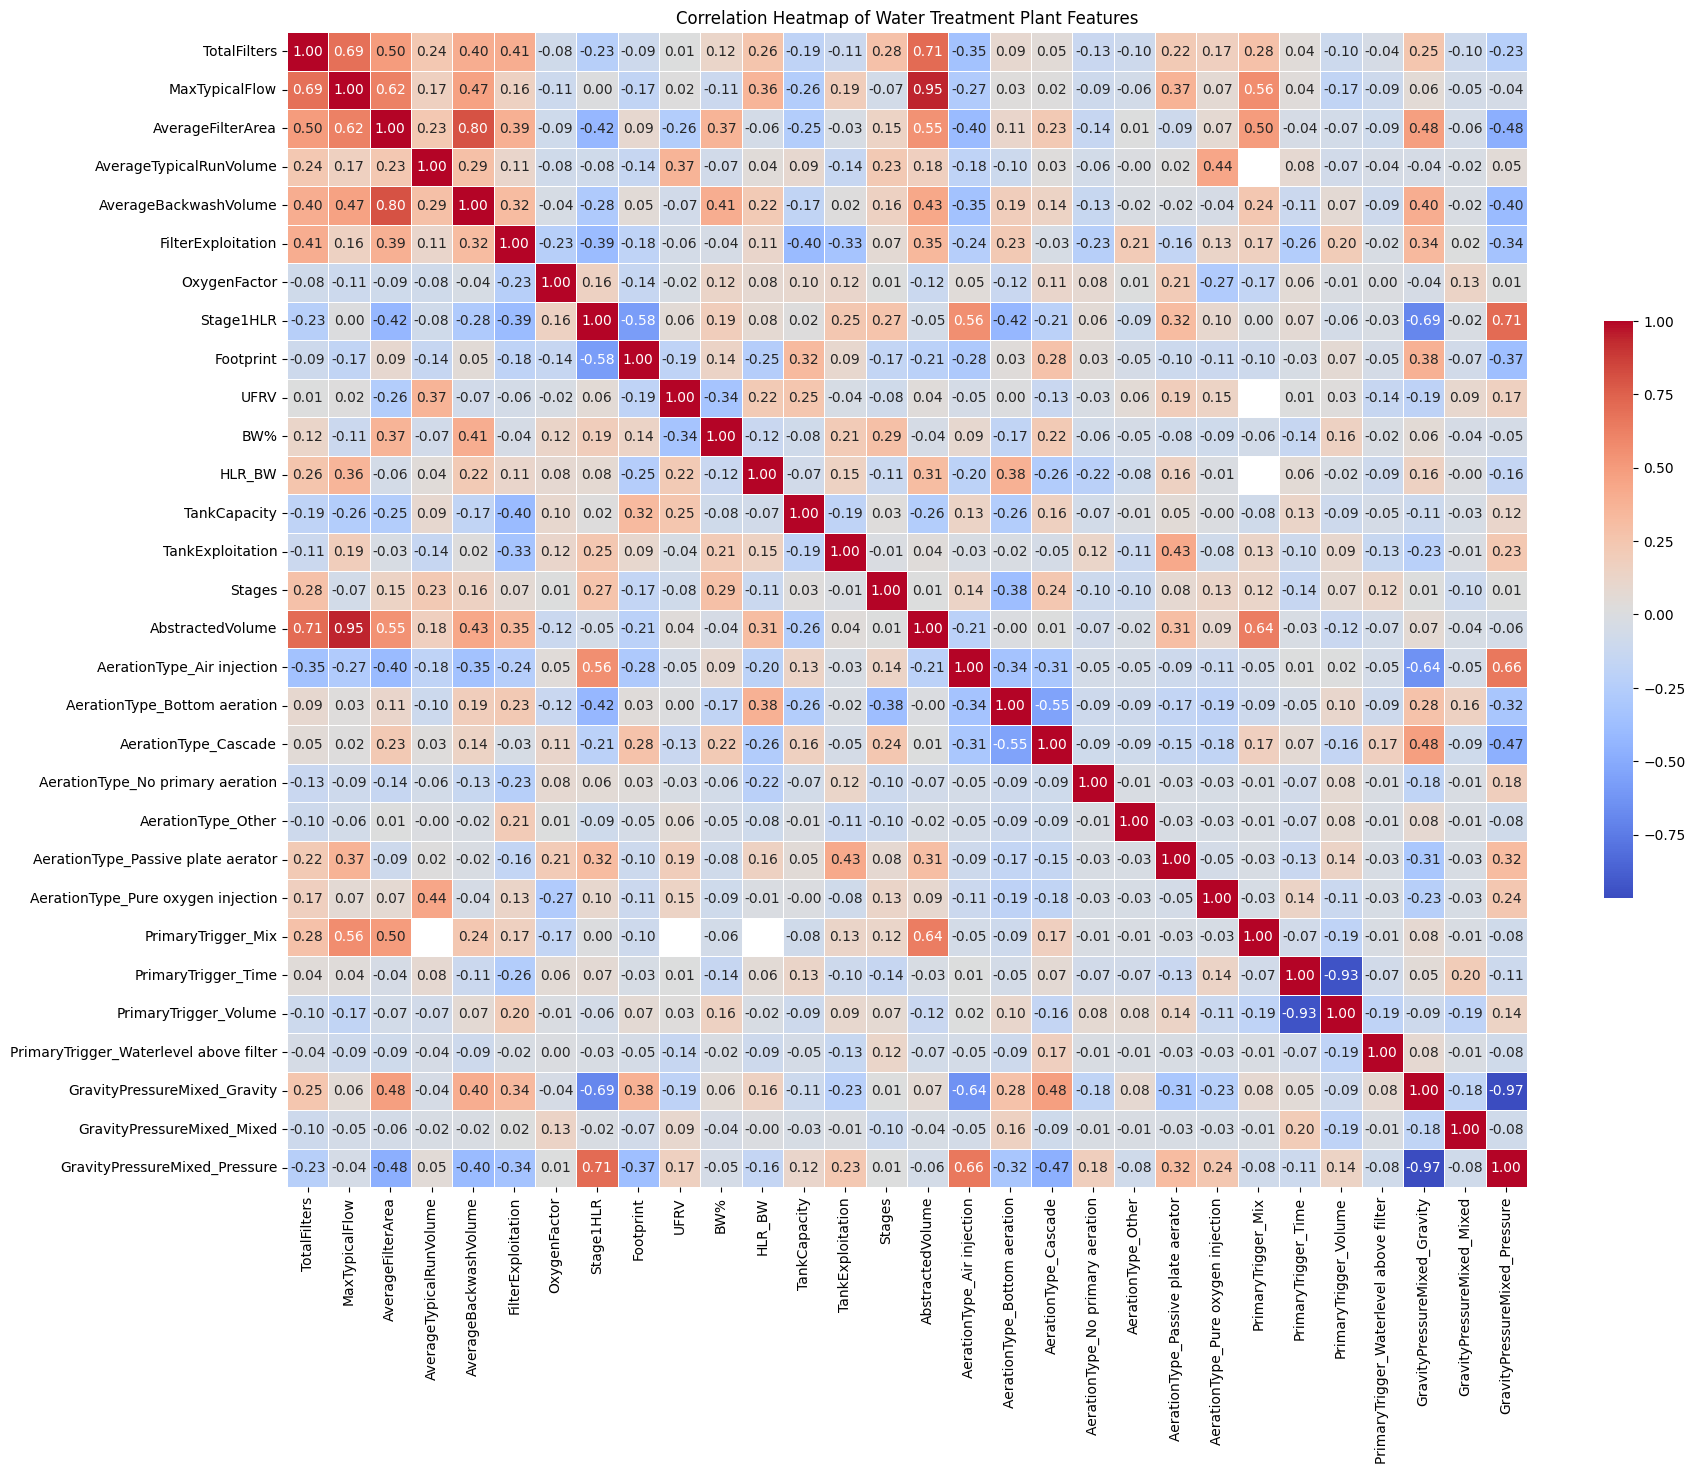

'Absolute correlation values to AverageBackwashVolume'

AverageBackwashVolume                    1.00%
AverageFilterArea                        0.80%
MaxTypicalFlow                           0.47%
AbstractedVolume                         0.43%
BW%                                      0.41%
TotalFilters                             0.40%
GravityPressureMixed_Pressure            0.40%
GravityPressureMixed_Gravity             0.40%
AerationType_Air injection               0.35%
FilterExploitation                       0.32%
AverageTypicalRunVolume                  0.29%
Stage1HLR                                0.28%
PrimaryTrigger_Mix                       0.24%
HLR_BW                                   0.22%
AerationType_Bottom aeration             0.19%
TankCapacity                             0.17%
Stages                                   0.16%
AerationType_Cascade                     0.14%
AerationType_No primary aeration         0.13%
PrimaryTrigger_Time                      0.11%
PrimaryTrigger_Waterlevel above filter   0.09%
UFRV         

In [479]:
# Calculate the correlation matrix
corr = df.corr()

# Initialize a matplotlib figure for displaying
plt.figure(figsize=(20, 15))

# Use seaborn for a neat heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={'shrink': .5})

# Add a title
plt.title('Correlation Heatmap of Water Treatment Plant Features')

plt.show()

# Display the absolute correlation values to AbstractedVolume (The higher the better)
display('Absolute correlation values to AverageBackwashVolume')
corr["AverageBackwashVolume"].abs().sort_values(ascending=False)

### After analyzing the correlation matrix, these are the methods we choose to use for imputing the missing values:

- 0 to 10% missing values: Impute with the mean

- FilterExploitation (17.39%) We didn't find any closely correlated features. Imputing the values using the mean.

- MaxTypicalFlow (17.39%) We found correlated features, so we will use linear regression to predict the missing values.

- Stage1HLR (23.19%) We found correlated features, so we will use linear regression to predict the missing values.

- HLR_BW (28.99%) We didn't find any closely correlated features. Imputing the values using the mean.

- TankExploitation (34.78%) We didn't find any closely correlated features. Imputing the values using the mean.

In [480]:
# Imuputing the data of the columns with 0 - 10% missing values using

# Columns with 0 - 10% missing data
columns_to_impute = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 10)].index
display(columns_to_impute)

# Impute missing values with the mean for these columns
for column in columns_to_impute:
    df[column].fillna(df[column].mean(), inplace=True)



Index(['AverageTypicalRunVolume', 'TankCapacity', 'Footprint',
       'AverageFilterArea', 'BW%', 'UFRV'],
      dtype='object')

/tmp/ipykernel_8925/481131711.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [481]:
# Impute missing values in 'FilterExploitation' with the mean
df['FilterExploitation'].fillna(df['FilterExploitation'].mean(), inplace=True)


/tmp/ipykernel_8925/466152485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FilterExploitation'].fillna(df['FilterExploitation'].mean(), inplace=True)


In [482]:
# Select features that have high correlation with 'MaxTypicalFlow'
features = ['AbstractedVolume']

# Split the data into training and testing sets
train_data = df[df['MaxTypicalFlow'].notna()]
test_data = df[df['MaxTypicalFlow'].isna()]

# Train the linear regression model
lr = LinearRegression()
lr.fit(train_data[features], train_data['MaxTypicalFlow'])

# Predict the missing values
predicted_values = lr.predict(test_data[features])

# Fill the missing values in the original dataframe
df.loc[df['MaxTypicalFlow'].isna(), 'MaxTypicalFlow'] = predicted_values


In [483]:
# Select features that have high correlation with 'Stage1HLR'
features = ['GravityPressureMixed_Gravity', 'GravityPressureMixed_Pressure']

# Split the data into training and testing sets
train_data = df[df['Stage1HLR'].notna()]
test_data = df[df['Stage1HLR'].isna()]

# Train the linear regression model
lr = LinearRegression()
lr.fit(train_data[features], train_data['Stage1HLR'])

# Predict the missing values
predicted_values = lr.predict(test_data[features])

# Fill the missing values in the original dataframe
df.loc[df['Stage1HLR'].isna(), 'Stage1HLR'] = predicted_values



In [484]:
df['HLR_BW'].fillna(df['HLR_BW'].mean(), inplace=True)


/tmp/ipykernel_8925/2259257636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HLR_BW'].fillna(df['HLR_BW'].mean(), inplace=True)


In [485]:
df['TankExploitation'].fillna(df['TankExploitation'].mean(), inplace=True)


/tmp/ipykernel_8925/2255390212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TankExploitation'].fillna(df['TankExploitation'].mean(), inplace=True)


In [486]:
#Verify the imputations making sure there are no missing values
print("Missing values after imputation:")
display(df.isnull().sum())

Missing values after imputation:


TotalFilters                              0
MaxTypicalFlow                            0
AverageFilterArea                         0
AverageTypicalRunVolume                   0
AverageBackwashVolume                     0
FilterExploitation                        0
OxygenFactor                              0
Stage1HLR                                 0
Footprint                                 0
UFRV                                      0
BW%                                       0
HLR_BW                                    0
TankCapacity                              0
TankExploitation                          0
Stages                                    0
AbstractedVolume                          0
AerationType_Air injection                0
AerationType_Bottom aeration              0
AerationType_Cascade                      0
AerationType_No primary aeration          0
AerationType_Other                        0
AerationType_Passive plate aerator        0
AerationType_Pure oxygen injecti

### Scaling


In [487]:
# Filter the columns to show all numerical and percentage features
numerical_percentage_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_percentage_features]


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,Stages,AbstractedVolume
0,6,50.00%,6.00%,5200.00%,10.00%,57.89%,1.88%,1.39%,143.34%,866.67%,0.41%,31.43%,27.29%,23.75%,1,253543
1,4,110.00%,4.91%,300.00%,28.00%,63.52%,1.62%,11.20%,16.71%,40.74%,23.00%,30.56%,2.58%,23.75%,2,612094
2,4,120.00%,15.34%,3800.00%,83.30%,64.91%,2.21%,3.94%,44.69%,249.22%,2.19%,32.79%,21.83%,23.75%,2,682318
3,2,78.52%,16.00%,1200.00%,26.00%,61.63%,2.07%,3.12%,194.59%,75.00%,2.17%,31.43%,12.55%,23.75%,1,156998
4,2,59.41%,1.49%,250.00%,4.50%,61.63%,1.31%,3.12%,412.30%,167.22%,1.82%,31.43%,52.22%,23.75%,1,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00%,47.94%,5324.89%,110.00%,91.70%,1.55%,5.24%,24.11%,296.28%,0.18%,31.43%,9.18%,39.68%,2,11454775
75,20,1407.29%,10.18%,4500.00%,57.00%,89.41%,2.13%,6.91%,22.05%,442.10%,1.24%,51.09%,6.04%,23.75%,1,11021800
76,6,250.00%,14.75%,2331.50%,51.57%,19.33%,1.67%,2.82%,209.08%,158.04%,4.45%,30.37%,22.37%,45.83%,1,423362
77,12,252.07%,37.44%,4400.00%,134.00%,61.63%,2.20%,3.12%,152.51%,93.49%,35.39%,32.05%,17.91%,23.75%,2,1521895


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,6,50.00%,6.00%,5200.00%,10.00%,57.89%,1.88%,1.39%,143.34%,866.67%,...,False,False,False,False,True,False,False,True,False,False
1,4,110.00%,4.91%,300.00%,28.00%,63.52%,1.62%,11.20%,16.71%,40.74%,...,False,False,False,False,False,True,False,False,False,True
2,4,120.00%,15.34%,3800.00%,83.30%,64.91%,2.21%,3.94%,44.69%,249.22%,...,False,False,False,False,False,True,False,True,False,False
3,2,78.52%,16.00%,1200.00%,26.00%,61.63%,2.07%,3.12%,194.59%,75.00%,...,False,False,False,False,False,True,False,True,False,False
4,2,59.41%,1.49%,250.00%,4.50%,61.63%,1.31%,3.12%,412.30%,167.22%,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00%,47.94%,5324.89%,110.00%,91.70%,1.55%,5.24%,24.11%,296.28%,...,False,False,False,True,False,False,False,True,False,False
75,20,1407.29%,10.18%,4500.00%,57.00%,89.41%,2.13%,6.91%,22.05%,442.10%,...,False,True,False,False,False,True,False,False,False,True
76,6,250.00%,14.75%,2331.50%,51.57%,19.33%,1.67%,2.82%,209.08%,158.04%,...,False,False,False,False,True,False,False,True,False,False
77,12,252.07%,37.44%,4400.00%,134.00%,61.63%,2.20%,3.12%,152.51%,93.49%,...,False,False,False,False,False,True,False,True,False,False


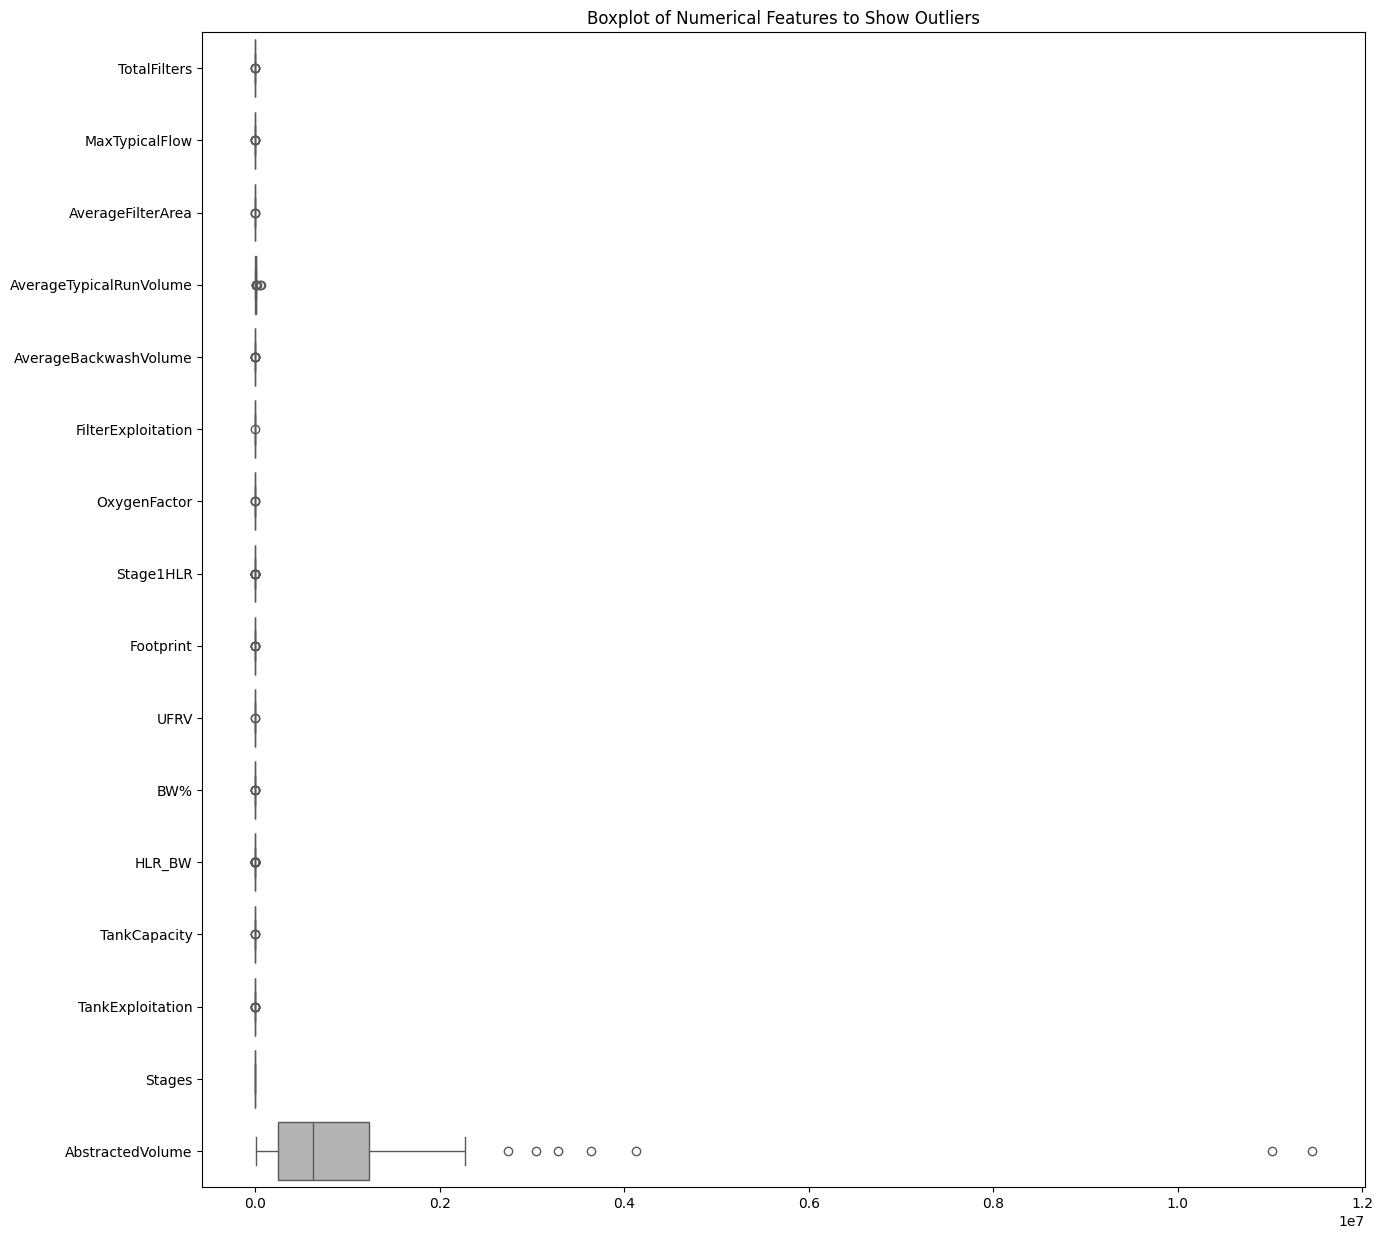

In [488]:
display(df)

# Visualize the outliers again using boxplots for each numerical feature.
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[numerical_percentage_features], orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features to Show Outliers')
plt.show()

Because we kept the outliers in our dataset, we will be using min-max scaling to ensure that all feature values are scaled between 0 and 1. This preserves the distribution of data, while maintaining the influence of outliers in proportion to the range of each feature. 

In [489]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 
                    'AverageBackwashVolume', 'FilterExploitation', 'OxygenFactor', 'Stage1HLR', 
                    'Footprint', 'UFRV', 'BW%', 'HLR_BW', 'TankCapacity', 'TankExploitation', 
                    'AbstractedVolume']

# Apply the scaler to the selected columns
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Verify the scaling
print("Scaled data using MinMaxScaler:")
display(df)
df.describe()

Scaled data using MinMaxScaler:


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.26%,0.03%,0.10%,0.08%,0.05%,0.42%,0.61%,0.04%,0.33%,0.97%,...,False,False,False,False,True,False,False,True,False,False
1,0.16%,0.07%,0.08%,0.00%,0.16%,0.47%,0.40%,0.69%,0.02%,0.00%,...,False,False,False,False,False,True,False,False,False,True
2,0.16%,0.08%,0.30%,0.06%,0.49%,0.49%,0.88%,0.21%,0.09%,0.25%,...,False,False,False,False,False,True,False,True,False,False
3,0.05%,0.05%,0.31%,0.02%,0.15%,0.45%,0.77%,0.15%,0.46%,0.04%,...,False,False,False,False,False,True,False,True,False,False
4,0.05%,0.04%,0.00%,0.00%,0.02%,0.45%,0.15%,0.15%,1.00%,0.15%,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.79%,1.00%,1.00%,0.08%,0.65%,0.75%,0.34%,0.29%,0.04%,0.30%,...,False,False,False,True,False,False,False,True,False,False
75,1.00%,0.99%,0.19%,0.07%,0.33%,0.73%,0.82%,0.40%,0.03%,0.47%,...,False,True,False,False,False,True,False,False,False,True
76,0.26%,0.17%,0.29%,0.03%,0.30%,0.04%,0.44%,0.13%,0.50%,0.14%,...,False,False,False,False,True,False,False,True,False,False
77,0.58%,0.17%,0.77%,0.07%,0.79%,0.45%,0.87%,0.15%,0.36%,0.06%,...,False,False,False,False,False,True,False,True,False,False


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,Stages,AbstractedVolume
count,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%,69.00%
mean,0.28%,0.14%,0.23%,0.08%,0.23%,0.45%,0.63%,0.29%,0.16%,0.30%,0.08%,0.46%,0.16%,0.25%,1.46%,0.10%
std,0.22%,0.19%,0.19%,0.15%,0.21%,0.21%,0.21%,0.27%,0.15%,0.21%,0.15%,0.15%,0.15%,0.18%,0.56%,0.17%
min,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
25%,0.11%,0.04%,0.09%,0.02%,0.08%,0.35%,0.53%,0.12%,0.06%,0.15%,0.03%,0.44%,0.07%,0.13%,1.00%,0.02%
50%,0.21%,0.08%,0.21%,0.05%,0.17%,0.45%,0.65%,0.17%,0.13%,0.27%,0.04%,0.46%,0.13%,0.25%,1.00%,0.05%
75%,0.37%,0.17%,0.29%,0.08%,0.29%,0.60%,0.78%,0.34%,0.19%,0.41%,0.07%,0.47%,0.21%,0.25%,2.00%,0.11%
max,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,1.00%,3.00%,1.00%


### Feature engineering and data transformation.
We did not transform or engineer any new features, because we do not posses any domain knowledge. Instead, we focused on using existing features and ensuring data quality through imputation and scaling. 

### Final Data

In [490]:
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,PrimaryTrigger_Mix,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.26%,0.03%,0.10%,0.08%,0.05%,0.42%,0.61%,0.04%,0.33%,0.97%,...,False,False,False,False,True,False,False,True,False,False
1,0.16%,0.07%,0.08%,0.00%,0.16%,0.47%,0.40%,0.69%,0.02%,0.00%,...,False,False,False,False,False,True,False,False,False,True
2,0.16%,0.08%,0.30%,0.06%,0.49%,0.49%,0.88%,0.21%,0.09%,0.25%,...,False,False,False,False,False,True,False,True,False,False
3,0.05%,0.05%,0.31%,0.02%,0.15%,0.45%,0.77%,0.15%,0.46%,0.04%,...,False,False,False,False,False,True,False,True,False,False
4,0.05%,0.04%,0.00%,0.00%,0.02%,0.45%,0.15%,0.15%,1.00%,0.15%,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.79%,1.00%,1.00%,0.08%,0.65%,0.75%,0.34%,0.29%,0.04%,0.30%,...,False,False,False,True,False,False,False,True,False,False
75,1.00%,0.99%,0.19%,0.07%,0.33%,0.73%,0.82%,0.40%,0.03%,0.47%,...,False,True,False,False,False,True,False,False,False,True
76,0.26%,0.17%,0.29%,0.03%,0.30%,0.04%,0.44%,0.13%,0.50%,0.14%,...,False,False,False,False,True,False,False,True,False,False
77,0.58%,0.17%,0.77%,0.07%,0.79%,0.45%,0.87%,0.15%,0.36%,0.06%,...,False,False,False,False,False,True,False,True,False,False


# Issues with the dataset.

### High Risk of Overfitting.

With only around 80 rows, the model could easily "memorize" the specific patterns in the training set instead of learning. This will results in a model that performs well on the training data but poorly on unseen data.

#### Solution.
Use simpler algorithms like linear or logistic regression, or decision trees with shallow depth. These models are less likely to overfit small datasets compared to complex models.

Applying techniques like L1 or L2 regularization to penalize overly complex models, helping to prevent overfitting.




### Sensitivity to Outliers.

Small datasets are more sensitive to outliers or unusual values. Anomalies can disproportionately affect the model's performance and skew results.

#### Solution.
Using robust scaling techniques (e.g., median scaling or logarithmic transformation) to reduce the impact of extreme values.

Carefully assessing outliers to determine if they represent true variations in data or errors. If they seem erroneous, consider removing them; if they’re meaningful, create features to account for them explicitly.

### High Variance in Model Performance.
With only 80 rows, small changes in the data can result in large variations in model predictions. This instability can lead to inconsistent results across different subsets of the data.
#### Solution.
Using k-fold cross-validation and report average performance to get a more stable estimate.
